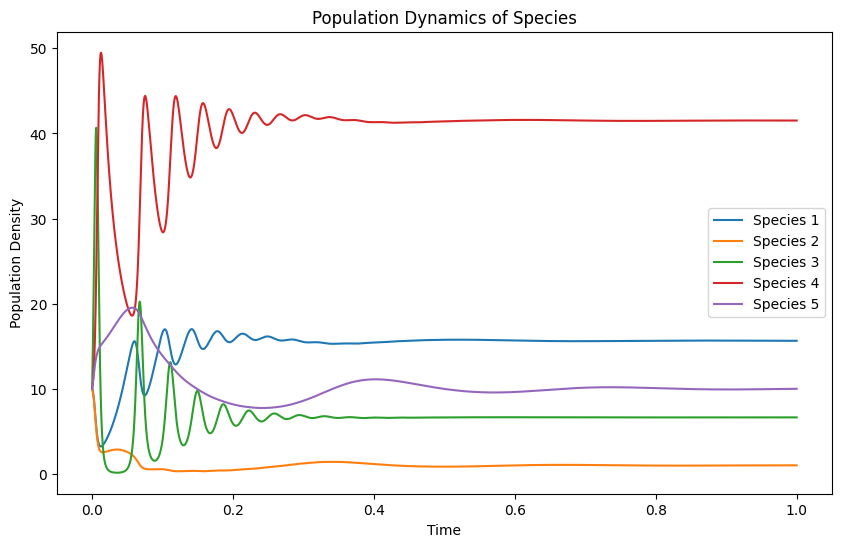

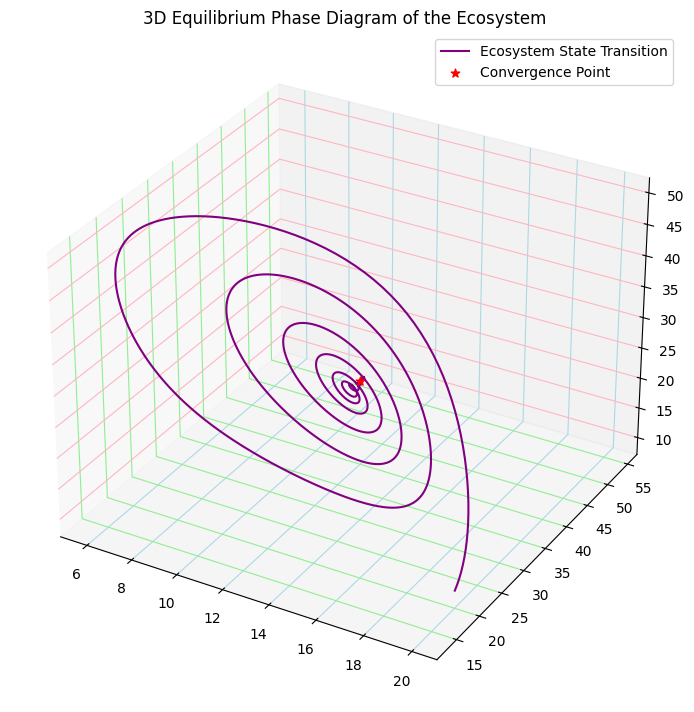

In [38]:
from scipy.integrate import odeint
import numpy as np
import matplotlib.pyplot as plt

# Define the number of species
m = 5

# Define the interaction matrix A (m x m) with predefined values
A = 10*np.array([[-0.1       , -0.1     , -0.5      , 0         , 0         ], #crop
              [-0.1       , -0.1      ,-0.5      , 0         , -0.5      ], # weeds
              [2.5        , 2.5        , -0.1       , -1       , 0         ], #insects
              [0          , 0         , 0.6      , -0.1       , 0         ],  #birds
              [0         , 0.8       , 0        , 0          , -0.1       ]])  #rabbits

# Define the initial population vector N0 (m-dimensional)
N0 = np.array([10,10,10,10,10])

# Define the intrinsic growth rates vector r (m-dimensional)
r = 10*np.array([5, 10, 0.5, 0.2, 0.2])

# Define the carrying capacities vector K (m-dimensional)
K = 10*np.array([1200, 600,  300, 20, 20])

# Define the time points where solution is computed
t = np.linspace(0, 1, 5000)

# Define the differential equation
def dN_dt(N, t, r, K, A):
    N = np.array(N)
    dN = r * N * (1 - N / K) + np.dot(A * np.outer(N, N.T), np.ones(m))
    return dN

# Solve the differential equation
solution = odeint(dN_dt, N0, t, args=(r, K, A))

# Plot the results
plt.figure(figsize=(10, 6))
for i in range(m):
    plt.plot(t, solution[:, i], label=f'Species {i+1}')
plt.xlabel('Time')
plt.ylabel('Population Density')
plt.title('Population Dynamics of Species')
plt.legend()
plt.show()

from mpl_toolkits.mplot3d import Axes3D

# Create a 3D plot with a larger figure size
fig = plt.figure(figsize=(7, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot the trajectory of the ecosystem state transitions
ax.plot(solution[:, 0]+solution[:,1], solution[:, 2]+solution[:, 4], solution[:, 3], color='purple', label='Ecosystem State Transition')

# Plot the convergence point
convergence_point = [solution[-1, 0]+solution[-1,1], solution[-1, 2]+solution[-1,4], solution[-1, 3]]
ax.scatter(convergence_point[0], convergence_point[1], convergence_point[2], color='red', marker='*', s=40, label='Convergence Point')

# Set labels
# ax.set_xlabel('Species 1 Population')
# ax.set_ylabel('Species 2 Population')
# ax.set_zlabel('Species 3 Population')
ax.set_title('3D Equilibrium Phase Diagram of the Ecosystem')

# Change the background grid color for each axis
ax.xaxis._axinfo['grid'].update(color='lightblue')
ax.yaxis._axinfo['grid'].update(color='lightgreen')
ax.zaxis._axinfo['grid'].update(color='lightpink')

# Add legend
ax.legend()
plt.tight_layout()

# Show plot
plt.show()



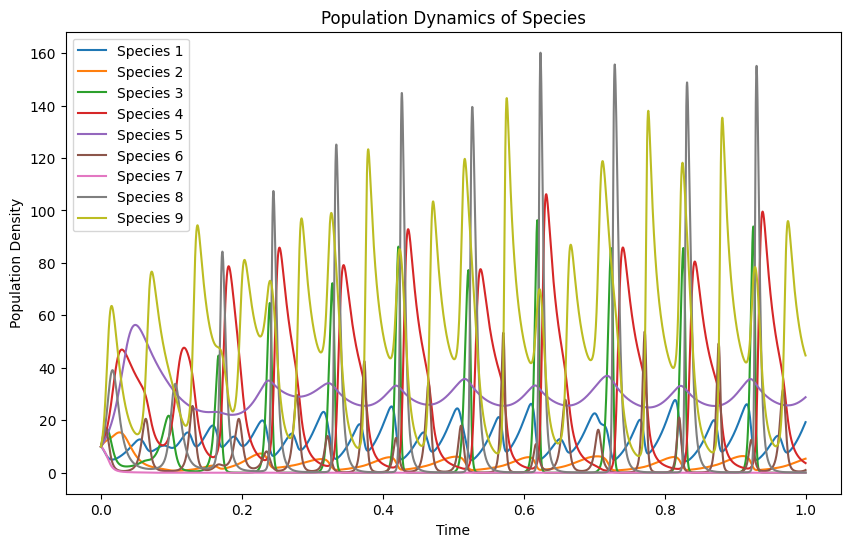

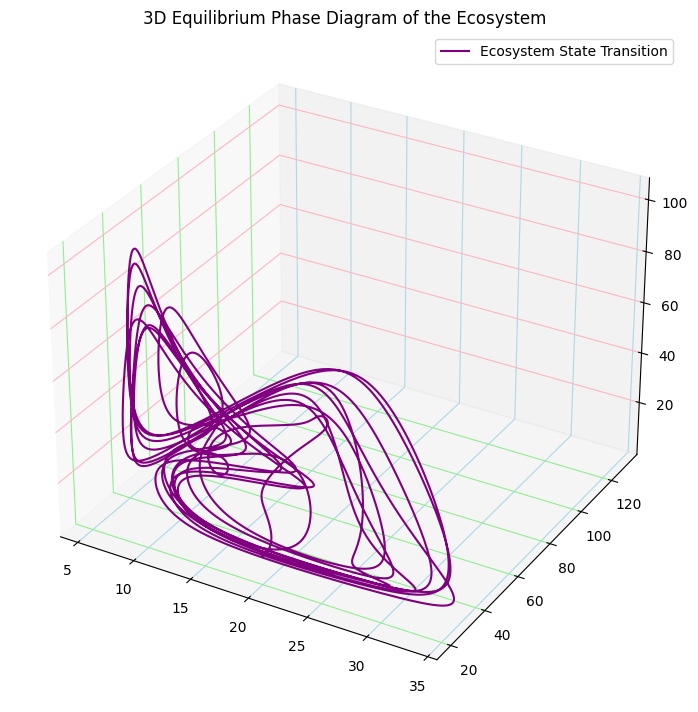

In [39]:
# Define the number of species
m = 9

# Define the interaction matrix A (m x m) with predefined values
A = 5 * np.array([
    [-0.1, -0.1, -0.5, 0, 0, -0.8, 0, 0, 0],  # crop
    [-0.1, -0.1, -0.5, 0, -0.5, 0, 0, 0, 0],  # weeds
    [2.5, 2.5, -0.1, -1, 0, 0, -1, -1, 0],  # insects
    [0, 0, 0.6, -0.1, 0, 0, 0, 0.6, -0.2],  # birds
    [0, 0.8, 0, 0, -0.1, 0, 0, 0, 0],  # rabbits
    [4, 0, 0, 0, 0, -0.1, 0, 0, -1],  # mouse
    [0, 0, 0, 0, 0, 0, -0.1, 0, -0.5],  # frog
    [0, 0, 2, -0.5, 0, 0, 0, -0.1, 0],  # mantis
    [0, 0, 0, -0.2, 0, 2, 1, 0, -0.1]  # snake
])

# Define the initial population vector N0 (m-dimensional)
N0 = np.array([10, 10, 10, 10, 10, 10, 10, 10, 10])

# Define the intrinsic growth rates vector r (m-dimensional)
r = 10 * np.array([5, 10, 0.5, 0.2, 0.2, 0.1, 0.1, 0.1, 0.1])

# Define the carrying capacities vector K (m-dimensional)
K = 10 * np.array([1200, 600, 300, 20, 10, 5, 5, 5, 2])

# Define the time points where solution is computed
t = np.linspace(0, 1, 5000)

# Define the differential equation
def dN_dt(N, t, r, K, A):
    N = np.array(N)
    dN = r * N * (1 - N / K) + np.dot(A * np.outer(N, N.T), np.ones(m))
    return dN

# Solve the differential equation
solution = odeint(dN_dt, N0, t, args=(r, K, A))

# Plot the results
plt.figure(figsize=(10, 6))
for i in range(m):
    plt.plot(t, solution[:, i], label=f'Species {i+1}')
plt.xlabel('Time')
plt.ylabel('Population Density')
plt.title('Population Dynamics of Species')
plt.legend()
plt.show()

# Create a 3D plot with a larger figure size
fig = plt.figure(figsize=(7, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot the trajectory of the ecosystem state transitions
ax.plot(solution[:, 0] + solution[:, 1], solution[:, 2] + solution[:, 4], solution[:, 3], color='purple', label='Ecosystem State Transition')

# # Plot the convergence point
# convergence_point = [solution[-1, 0] + solution[-1, 1], solution[-1, 2] + solution[-1, 4], solution[-1, 3]]
# ax.scatter(convergence_point[0], convergence_point[1], convergence_point[2], color='red', marker='*', s=40, label='Convergence Point')

# Set labels
ax.set_title('3D Equilibrium Phase Diagram of the Ecosystem')

# Change the background grid color for each axis
ax.xaxis._axinfo['grid'].update(color='lightblue')
ax.yaxis._axinfo['grid'].update(color='lightgreen')
ax.zaxis._axinfo['grid'].update(color='lightpink')

# Add legend
ax.legend()
plt.tight_layout()

# Show plot
plt.show()
